<a href="https://colab.research.google.com/github/PuruBehl/houses/blob/master/Football_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data=pd.read_csv('/content/drive/My Drive/CFB2019.csv')

In [52]:
data.head()

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,...,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,...,20,34,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15
1,Akron (MAC),12,0-12,130,725,2918,4.02,14,243.2,83,871,4967,5.70,51,56,413.9,130,51,91,13,155,58,138,106,17,261,124,7,22,0.318,74,8,15,0.533,1,15,13,223,0,14.87,...,122,56,55,1,0,14,0,435,36.3,130,15,13,1,0,7,0,126,10.5,124,37,28,147,51,4.3,130,163,43,0.264,122,317:52,26:29,128,6,5,11,12,14,26,-15,-1.25
2,Alabama (SEC),13,11-2,6,842,6640,7.89,76,510.8,20,877,4218,4.81,24,26,324.5,15,126,168,24,318,40,95,121,31,247,12,13,19,0.684,11,7,19,0.368,11,27,35,469,0,17.37,...,13,26,22,2,0,20,0,242,18.6,2,83,80,0,0,12,0,614,47.2,61,61,34,317,78,6.0,3,153,80,0.523,70,389:58,29:59,3,11,17,28,4,6,10,18,1.38
3,Appalachian St. (Sun Belt),14,13-1,39,969,6064,6.26,65,433.1,26,940,4705,5.01,34,35,336.1,32,151,124,20,295,51,97,133,28,258,1,13,16,0.813,94,15,26,0.577,29,48,29,910,0,18.96,...,21,35,29,1,0,13,0,280,20.0,9,73,72,0,0,11,0,543,38.8,56,67,38,380,86,6.1,26,200,89,0.445,36,438:26,31:19,7,10,14,24,3,6,9,15,1.07
4,Arizona (Pac-12),12,4-8,30,873,5281,6.05,42,440.1,120,889,5657,6.36,53,54,471.4,63,111,139,20,270,116,122,145,26,293,19,13,20,0.650,5,6,18,0.333,95,10,48,222,0,22.20,...,118,54,52,1,0,17,0,429,35.8,77,42,37,1,0,10,1,323,26.9,120,43,22,175,54,4.5,28,186,82,0.441,115,328:53,27:24,89,4,11,15,6,12,18,-3,-0.25


In [0]:
wins=data['Win-Loss'].values

In [0]:
for i in range(len(wins)):
  wins[i]=int(wins[i].split('-')[0])

In [55]:

wins

array([11, 0, 11, 13, 4, 8, 2, 8, 5, 9, 5, 11, 12, 6, 3, 8, 7, 8, 8, 7,
       11, 14, 5, 5, 4, 5, 4, 6, 6, 11, 11, 6, 4, 7, 12, 7, 3, 10, 4, 6,
       8, 10, 7, 3, 8, 7, 8, 5, 8, 11, 10, 8, 15, 8, 3, 1, 12, 6, 8, 9, 7,
       4, 11, 6, 6, 11, 4, 5, 7, 2, 2, 7, 4, 5, 3, 11, 7, 13, 12, 8, 1, 4,
       12, 5, 11, 8, 4, 3, 2, 10, 5, 10, 2, 4, 4, 8, 7, 4, 5, 5, 8, 8, 8,
       8, 3, 4, 6, 5, 7, 4, 9, 10, 4, 2, 4, 11, 7, 1, 4, 3, 9, 8, 8, 8, 6,
       5, 9, 7, 10, 8], dtype=object)

In [0]:
data['Wins']=wins

In [57]:
data.head()

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,...,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins
0,Air Force (Mountain West),13,11,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,...,34,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15,11
1,Akron (MAC),12,0,130,725,2918,4.02,14,243.2,83,871,4967,5.70,51,56,413.9,130,51,91,13,155,58,138,106,17,261,124,7,22,0.318,74,8,15,0.533,1,15,13,223,0,14.87,...,56,55,1,0,14,0,435,36.3,130,15,13,1,0,7,0,126,10.5,124,37,28,147,51,4.3,130,163,43,0.264,122,317:52,26:29,128,6,5,11,12,14,26,-15,-1.25,0
2,Alabama (SEC),13,11,6,842,6640,7.89,76,510.8,20,877,4218,4.81,24,26,324.5,15,126,168,24,318,40,95,121,31,247,12,13,19,0.684,11,7,19,0.368,11,27,35,469,0,17.37,...,26,22,2,0,20,0,242,18.6,2,83,80,0,0,12,0,614,47.2,61,61,34,317,78,6.0,3,153,80,0.523,70,389:58,29:59,3,11,17,28,4,6,10,18,1.38,11
3,Appalachian St. (Sun Belt),14,13,39,969,6064,6.26,65,433.1,26,940,4705,5.01,34,35,336.1,32,151,124,20,295,51,97,133,28,258,1,13,16,0.813,94,15,26,0.577,29,48,29,910,0,18.96,...,35,29,1,0,13,0,280,20.0,9,73,72,0,0,11,0,543,38.8,56,67,38,380,86,6.1,26,200,89,0.445,36,438:26,31:19,7,10,14,24,3,6,9,15,1.07,13
4,Arizona (Pac-12),12,4,30,873,5281,6.05,42,440.1,120,889,5657,6.36,53,54,471.4,63,111,139,20,270,116,122,145,26,293,19,13,20,0.650,5,6,18,0.333,95,10,48,222,0,22.20,...,54,52,1,0,17,0,429,35.8,77,42,37,1,0,10,1,323,26.9,120,43,22,175,54,4.5,28,186,82,0.441,115,328:53,27:24,89,4,11,15,6,12,18,-3,-0.25,4


In [60]:
data['Win Percentage']=data['Wins']/data['Games']
data['Win Percentage']=data['Win Percentage'].astype('float')
data['Win Percentage'].head()

0    0.846154
1    0.000000
2    0.846154
3    0.928571
4    0.333333
Name: Win Percentage, dtype: float64

In [61]:
data.head()

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,...,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins,Win Percentage
0,Air Force (Mountain West),13,11,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,...,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15,11,0.846154
1,Akron (MAC),12,0,130,725,2918,4.02,14,243.2,83,871,4967,5.70,51,56,413.9,130,51,91,13,155,58,138,106,17,261,124,7,22,0.318,74,8,15,0.533,1,15,13,223,0,14.87,...,55,1,0,14,0,435,36.3,130,15,13,1,0,7,0,126,10.5,124,37,28,147,51,4.3,130,163,43,0.264,122,317:52,26:29,128,6,5,11,12,14,26,-15,-1.25,0,0.000000
2,Alabama (SEC),13,11,6,842,6640,7.89,76,510.8,20,877,4218,4.81,24,26,324.5,15,126,168,24,318,40,95,121,31,247,12,13,19,0.684,11,7,19,0.368,11,27,35,469,0,17.37,...,22,2,0,20,0,242,18.6,2,83,80,0,0,12,0,614,47.2,61,61,34,317,78,6.0,3,153,80,0.523,70,389:58,29:59,3,11,17,28,4,6,10,18,1.38,11,0.846154
3,Appalachian St. (Sun Belt),14,13,39,969,6064,6.26,65,433.1,26,940,4705,5.01,34,35,336.1,32,151,124,20,295,51,97,133,28,258,1,13,16,0.813,94,15,26,0.577,29,48,29,910,0,18.96,...,29,1,0,13,0,280,20.0,9,73,72,0,0,11,0,543,38.8,56,67,38,380,86,6.1,26,200,89,0.445,36,438:26,31:19,7,10,14,24,3,6,9,15,1.07,13,0.928571
4,Arizona (Pac-12),12,4,30,873,5281,6.05,42,440.1,120,889,5657,6.36,53,54,471.4,63,111,139,20,270,116,122,145,26,293,19,13,20,0.650,5,6,18,0.333,95,10,48,222,0,22.20,...,52,1,0,17,0,429,35.8,77,42,37,1,0,10,1,323,26.9,120,43,22,175,54,4.5,28,186,82,0.441,115,328:53,27:24,89,4,11,15,6,12,18,-3,-0.25,4,0.333333


In [0]:
data=data.drop(['Win-Loss','Wins','Games'],axis=1)

***The Team With the highest win percentage is:***

In [63]:
data[data['Win Percentage']==max(data['Win Percentage'])]

,Team,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,...,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Win Percentage
52,LSU (SEC),1,1080,8527,7.9,93,568.5,31,1008,5153,5.11,39,42,343.5,1,151,243,24,418,105,87,158,38,283,14,6,9,0.667,53,15,31,0.484,97,15,110,337,0,22.47,63,14,...,42,37,3,0,11,0,328,21.9,1,95,89,1,0,21,1,726,48.4,40,76,40,419,96,6.4,4,183,91,0.497,53,455:44,30:22,15,5,17,22,5,7,12,10,0.67,1.0


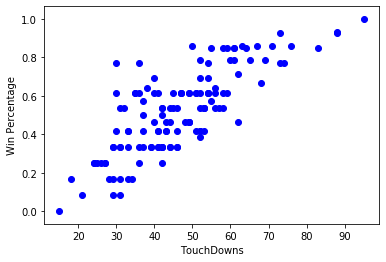

In [64]:
plt.scatter(data['Touchdowns'],data['Win Percentage'],color='blue')
plt.xlabel("TouchDowns")
plt.ylabel("Win Percentage")
plt.show()

In [0]:
import seaborn as sns

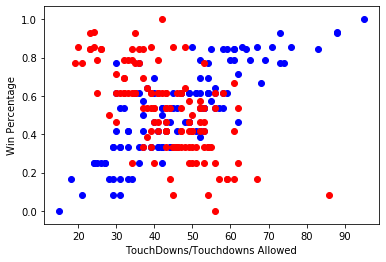

In [66]:
plt.scatter(data['Touchdowns'],data['Win Percentage'],color='blue');
plt.scatter(data['Touchdowns Allowed'],data['Win Percentage'],color='red')
plt.xlabel("TouchDowns/Touchdowns Allowed")
plt.ylabel("Win Percentage")
plt.show()

In [0]:
import random

In [0]:
data=data.drop(['Team'],axis=1)

In [69]:
data.head()

,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,...,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Win Percentage
0,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,129,7,93,...,34,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15,0.846154
1,130,725,2918,4.02,14,243.2,83,871,4967,5.70,51,56,413.9,130,51,91,13,155,58,138,106,17,261,124,7,22,0.318,74,8,15,0.533,1,15,13,223,0,14.87,53,40,859,...,56,55,1,0,14,0,435,36.3,130,15,13,1,0,7,0,126,10.5,124,37,28,147,51,4.3,130,163,43,0.264,122,317:52,26:29,128,6,5,11,12,14,26,-15,-1.25,0.000000
2,6,842,6640,7.89,76,510.8,20,877,4218,4.81,24,26,324.5,15,126,168,24,318,40,95,121,31,247,12,13,19,0.684,11,7,19,0.368,11,27,35,469,0,17.37,55,30,637,...,26,22,2,0,20,0,242,18.6,2,83,80,0,0,12,0,614,47.2,61,61,34,317,78,6.0,3,153,80,0.523,70,389:58,29:59,3,11,17,28,4,6,10,18,1.38,0.846154
3,39,969,6064,6.26,65,433.1,26,940,4705,5.01,34,35,336.1,32,151,124,20,295,51,97,133,28,258,1,13,16,0.813,94,15,26,0.577,29,48,29,910,0,18.96,18,23,562,...,35,29,1,0,13,0,280,20.0,9,73,72,0,0,11,0,543,38.8,56,67,38,380,86,6.1,26,200,89,0.445,36,438:26,31:19,7,10,14,24,3,6,9,15,1.07,0.928571
4,30,873,5281,6.05,42,440.1,120,889,5657,6.36,53,54,471.4,63,111,139,20,270,116,122,145,26,293,19,13,20,0.650,5,6,18,0.333,95,10,48,222,0,22.20,57,34,716,...,54,52,1,0,17,0,429,35.8,77,42,37,1,0,10,1,323,26.9,120,43,22,175,54,4.5,28,186,82,0.441,115,328:53,27:24,89,4,11,15,6,12,18,-3,-0.25,0.333333


In [0]:
random.seed(1)

In [0]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 144 entries, Off Rank to Win Percentage
dtypes: float64(30), int64(112), object(2)
memory usage: 146.4+ KB


In [0]:
feature_train=train[['Def Rank','Yards Allowed','First Downs','Opp First Downs','4th Conversions','Opp 4th Conversion','Penalties','Redzone Field Goals Made','Touchdowns Allowed','Touchdowns','Total Points','Turnovers Gain','Turnovers Lost']]

In [0]:
feature_test=test[['Def Rank','Yards Allowed','First Downs','Opp First Downs','4th Conversions','Opp 4th Conversion','Penalties','Redzone Field Goals Made','Touchdowns Allowed','Touchdowns','Total Points','Turnovers Gain','Turnovers Lost']]

In [258]:
regr.fit(feature_train,train['Win Percentage'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
ans=regr.predict(feature_test)

In [0]:
from sklearn.metrics import r2_score

In [261]:
print("The r2 score with the linear regression model is:",r2_score(ans,test['Win Percentage']))

The r2 score with the linear regression model is: 0.93680438039683


**From This We found out that the linear regression Model shows an accuracy of 0.7114957007584883 which is not that great so lets look at some other models**

# Descision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
drugTree = DecisionTreeRegressor(random_state=4)


In [270]:
drugTree # it shows the default parameters

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=4, splitter='best')

In [271]:
drugTree.fit(feature_train,train['Win Percentage'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=4, splitter='best')

In [0]:
ans=drugTree.predict(feature_test)

In [273]:
print('The R2_Score for the decision tree classifier is:',r2_score(ans,test['Win Percentage']))

The R2_Score for the decision tree classifier is: 0.5597057436550361


**Hence we see from this that decision tree regressor is definately not applicable for this type of problem**

**Enter 2 teams and i tell u the odds of the first team winning over the second team on the bases of the specified features.**

In [0]:
data2=pd.read_csv('/content/drive/My Drive/CFB2019.csv')

In [277]:
team1=input('Enter the your team name:')
team2=input('Enter the opponent team name:')
team1_data=data2[data2['Team']==team1]
team2_data=data2[data2['Team']==team2]

Enter the your team name:Baylor (Big 12)
Enter the opponent team name:California (Pac-12)


In [278]:
print(team1_data,team2_data)

               Team  Games  ... Turnover Margin  Avg Turnover Margin per Game
11  Baylor (Big 12)     14  ...              11                          0.79

[1 rows x 146 columns]                    Team  Games  ... Turnover Margin  Avg Turnover Margin per Game
17  California (Pac-12)     13  ...               3                          0.23

[1 rows x 146 columns]


In [0]:
rankings=data[['Def Rank','Off Rank','Win Percentage']]

In [282]:
rankings.head()

,Def Rank,Off Rank,Win Percentage
0,17,51,0.846154
1,83,130,0.000000
2,20,6,0.846154
3,26,39,0.928571
4,120,30,0.333333


In [283]:
rankings.corr()

,Def Rank,Off Rank,Win Percentage
Def Rank,1.000000,0.045477,-0.649831
Off Rank,0.045477,1.000000,-0.552639
Win Percentage,-0.649831,-0.552639,1.000000


In [0]:
def_corr=0.649831
off_corr=0.552639

In [299]:
def_rank1=team1_data['Def Rank'].values
off_rank1=team1_data['Off Rank'].values
def_rank2=team2_data['Def Rank'].values
off_rank2=team2_data['Off Rank'].values
print(def_rank1)

[39]


In [323]:
if (team1_data['Def Rank'].values*def_corr+team1_data['Off Rank'].values*off_corr)>((team2_data['Def Rank'].values*def_corr+team2_data['Off Rank'].values*off_corr)):
  print(team1,' has a chance of winning')
  print('The odds of the team winning are:',(data[data['Def Rank'].values==def_rank1]['Win Percentage'].values/data[data['Def Rank'].values==def_rank2]['Win Percentage'].values))

else:
  print(team2,' has a chance of winning over ',team1)
  print('The odds of the team winning are:',(data[data['Def Rank'].values==team1_data['Def Rank'].values]['Win Percentage'].values/data[data['Def Rank'].values==team2_data['Def Rank'].values]['Win Percentage'].values))



California (Pac-12)  has a chance of winning over  Baylor (Big 12)
The odds of the team winning are: [1.27678571]


**So this is the method that i made to find the team that might win .**
**This is an simple example and we will do something greater in the future so pls wait for the next statistic file.Hope you had an happy experience with us .Hope to meet again.**